# Genetic Algorithms Introductory Notebook:

# Task 1: Extremizing A polynomial within an Interval
### The Following Code Returns a Polynomial Function given a set of coefficients

## Example:
$\left[ \begin{array} ,1&2&3 \end{array} \right]\rightarrow x^2 + 2x + 3 $


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def polynomial_creator(*coeffs):
    """ coefficients are in the form a_n, a_n_1, ... a_1, a_0
    """
    def polynomial(x):
        res = coeffs[0]
        for i in range(1, len(coeffs)):
            res = res * x + coeffs[i]
        return res
    return polynomial

def polynomial_plotter(polynomial, domain, num_points=100, show_plot = True):
    """ plots the polynomial in the given range with the give number of points
    """
    start, stop = domain
    points = np.linspace(start, stop,num_points)
    func_values = polynomial(points)
    plt.plot(points, func_values)
    if show_plot:
        plt.show()

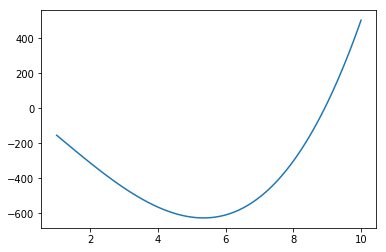

In [2]:
my_polynomial = polynomial_creator(3,-10,-150,3)
polynomial_plotter(my_polynomial, [1, 10])

### In a similar manner fill in the code below to return a multivariate function

## Example:
$\left[ \begin{array} ,1&2&3 \end{array} \right] , \left[ \begin{array} ,18&14&6&3 \end{array} \right] , \left[ \begin{array} ,12&3 \end{array} \right] \rightarrow f(x_1, x_2, x_3) = x_1^2 + 2x_1 + 3 + 18x_2^4 + 14x_2^3 + 6x_2^2 + 3x + 12x_3^2 + 3x $

### NOTE : The value of constant is given as the value of the first variable
Hint: You may use the polynomial creator function defined above


#### Optional/Bonus : Find a method to plot it
[How to plot multivariate functions](http://geog.uoregon.edu/bartlein/courses/geog495/lec05.html)


In [3]:
def multi_creator(*coefs):
    def multivariate_function(x):
        assert len(coefs)==len(x)
        polynomial = polynomial_creator(*coefs[0])(x[0])
        for i in range(1, len(x)):
            polynomial = polynomial + x[i]*polynomial_creator(*coefs[i])(x[i])
        return polynomial
    return multivariate_function

# Now lets extremize it! (Using genetic algoritms)
Problem : Find the maxima of this function using genetic algos
For this we require
1. Fitness function
2. An encoder function
3. A mating function

## Notations
1. $n$ : The number of variables in the multivariate funtion
2. $m$ : Size of the population
3. $R_i$ : Range of the ith variable, as a tuple with max and min

## Fitness function
This is the function that our model will try to maximize. Since our goal is to maximize the multivariable polynomial, it will become our fitness function

## Encoder function
This functions takes in input genes and transforms its into meaningfull values of the variables.
#### Genes
For the purpose of this excercise, genes of the population are represented 2D numpy array of shape (n,m). **Our genes will only take values between -5 and 5**
#### Example
1. Polynomial $x_1 + x_2^2 + x_3 - x_3^3$
2. Population size :m=5
3. Ranges : (-3, 4), (-1, 2), (3, 9)
##### Input (Gene Pool)
$\left[ \begin{array}4.9&2.8&-3.4\\-3.5&1.4&4.5\\0.6&-3&1.8\\0.55&3.8&4.0\\-2& 2.6& 3 \end{array}\right]$
##### Output (Fitness Values)
$\left[ \begin{array} -52.413 & \\
-650.906 & \\
-346.734 & \\
-580.729 & \\
-466.014 & \\
-26.000 & \\
\end{array}\right]$

## Mating Funtion
This consists of :
1. Mutation Function - Input = Gene : Output = Slightly modified gene
2. Crossover function - Input = 2 genes : Output =  Crossovered genes

Of each gene pool only the top few are selected and mated to get the gene pool of the next iteration.

#### Note
The following illustration will introduce you to the basics of Genetic algorithms. We insist you to write a mutation function and a crossover function on your own. 
[This](https://towardsdatascience.com/genetic-algorithm-implementation-in-python-5ab67bb124a6) might inspire you.

In [10]:
import random

lower_bound_x, upper_bound_x, retain_fraction, selection_bar, mutation_chances, n, size , ngen = (-5, 5, 0.25, 0.25, 0.1, 3, 20 ,1000000)
# retain_fraction indicates the fraction of people that will be retained in next generation and 
# selection_bar indicates the fraction of people that will be used for crossover
# mutation_chances indicates the farction of peope that will be mutated

polynomial = multi_creator([-1, 2, 3],[18, 14, 6, 3],[-12, 3]) # Different from the one in example

def individual(n=3): # n is the number of variables default:3
    return [ random.uniform(lower_bound_x, upper_bound_x) for i in range(n)]

def initial_population(n, size=5): # n is number of variables. Default initial population size is taken as 5
    return [ individual(n) for i in range(size)]

def selection(population):
    return sorted(population, key= lambda indiv: -polynomial(indiv))[:int(retain_fraction*len(population))] #sorted in descending order
    
def mutate(population):
    for i in range(int(len(population)*mutation_chances)):
        population[random.randint(0, len(population)-1)] = individual(n)
    return population

def crossover(individual1, individual2):
    new_individual = [0 for i in range(len(individual1))]
    for a in range(len(new_individual)):
        new_individual[a] = individual1[a] if random.choice([0,1]) else individual2[a]
    return new_individual

def crossover_population(population):
    selected_population = sorted(population, key= lambda indiv: -polynomial(indiv))[:int(selection_bar*len(population))]
    len_selected_population = len(selected_population)
    new_population = []
    for i in range(len(population) - int(retain_fraction*len(population))):
        a = random.randint(0, len_selected_population-1)
        b = a
        while(b==a):
            b = random.randint(0, len_selected_population-1)
        new_population.append(crossover(selected_population[a], selected_population[b]))
    return selection(population) + new_population

population = initial_population(n, size)
for i in range(ngen):
    population = mutate(population)
    population = crossover_population(population)
print(population)

[[0.9603490587182328, 4.999950848244515, 0.3782448966075922], [0.9603490587182328, 4.999950848244515, 0.3782448966075922], [0.9603490587182328, 4.999950848244515, 0.3782448966075922], [0.9603490587182328, 4.999950848244515, 0.3782448966075922], [0.9603490587182328, 4.999950848244515, 0.3782448966075922], [0.9603490587182328, 4.999950848244515, 0.3782448966075922], [0.9603490587182328, 4.999950848244515, 0.3782448966075922], [0.9603490587182328, 4.999950848244515, 0.3782448966075922], [0.9603490587182328, 4.999950848244515, 0.3782448966075922], [0.9603490587182328, 4.999950848244515, 0.3782448966075922], [0.9603490587182328, 4.999950848244515, 0.3782448966075922], [0.9603490587182328, 4.999950848244515, 0.3782448966075922], [0.9603490587182328, 4.999950848244515, 0.3782448966075922], [0.9603490587182328, 4.999950848244515, 0.3782448966075922], [0.9603490587182328, 4.999950848244515, 0.3782448966075922], [0.9603490587182328, 4.999950848244515, 0.3782448966075922], [0.9603490587182328, 4.